## Summary:
* the data has 263 elements with 5 features
* there are no NaNs in the data
* feature '0' has many outliers. If this feature's theoretical values have some strict boundaries, it might be a good idea to drop elements with outliers. But it depends on the data origin A LOT.
* features three and four have pearson's corr coef 0.77. Still the correlation is not that big and it looks like there two clusters of poinds, so I woludn't recommend to drop any of the features out.
* feature 2 depends on feature 1 quadratically, so it's a good idea to drop one of these columns. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode, zscore
from scipy.stats.stats import pearsonr
import seaborn as sns

Let's first read the dataset and check if there any NaNs.

In [2]:
df = pd.read_csv("var_2.csv", index_col=0)

In [3]:
df.head()

,0,1,2,3,4
0,42508.106940,-0.360718,0.125528,5.515998,15.994966
1,2679.524094,0.337659,0.108331,18.058783,68.720268
2,14631.233652,-0.009868,0.012254,26.712167,79.022925
3,24716.613413,-0.085418,0.077496,-0.084518,32.696152
4,102.401604,0.411524,0.152678,25.323752,91.281839


In [4]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

There aren't any NaNs. Let's print some basic statistics and histograms for the given distributions

Getting statistics for 0
Mean: 22056.79335423181
Sample variance: 682912073.5411371
Unbiased variance: 685518608.1729735
Skew coeff: 1.5041058111280077
Kurtosis coeff: 1.3325539716176094
Median: 13296.635148784038


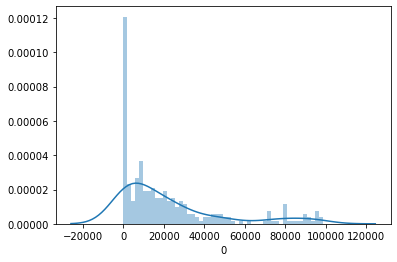

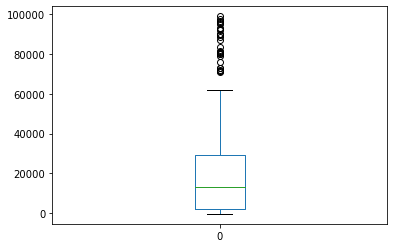

Getting statistics for 1
Mean: -0.024045498760075026
Sample variance: 0.08210285853696174
Unbiased variance: 0.08241622822603412
Skew coeff: 0.10883520578011423
Kurtosis coeff: -1.1785593722234087
Median: -0.048946244464822215


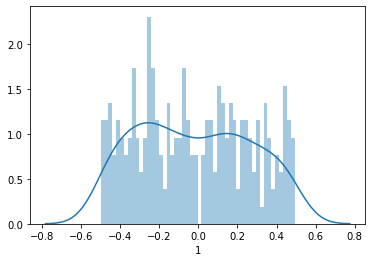

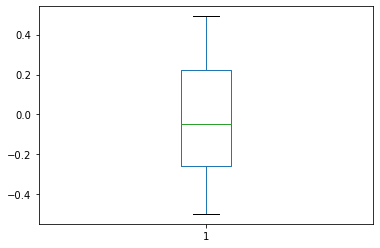

Getting statistics for 2
Mean: 0.08947157801511883
Sample variance: 0.00793609014028655
Unbiased variance: 0.007966380560669322
Skew coeff: 0.30664838747350887
Kurtosis coeff: -0.5281923673684639
Median: 0.08046629777425576


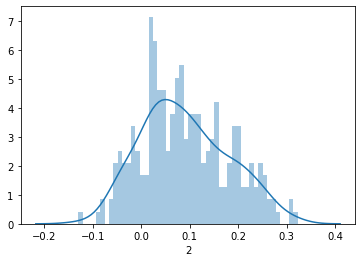

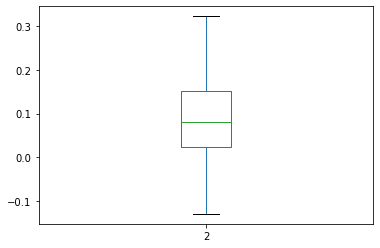

Getting statistics for 3
Mean: 12.385793548192698
Sample variance: 80.64806480518831
Unbiased variance: 80.95588184642949
Skew coeff: -0.2949117484257628
Kurtosis coeff: -1.2537828500450918
Median: 15.1673150652617


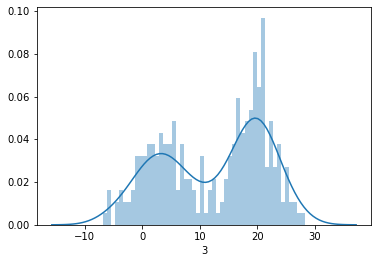

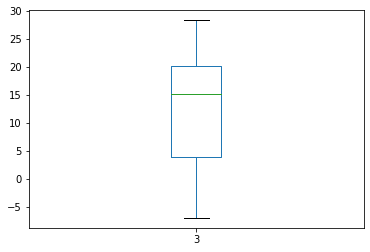

Getting statistics for 4
Mean: 57.97757167632925
Sample variance: 961.3797785072887
Unbiased variance: 965.0491669748739
Skew coeff: -0.31978006466970976
Kurtosis coeff: -1.324681303797752
Median: 66.72077764398372


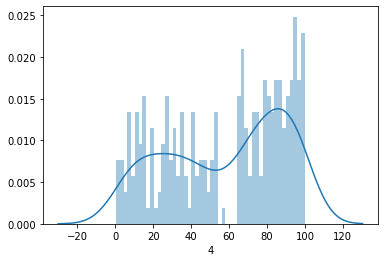

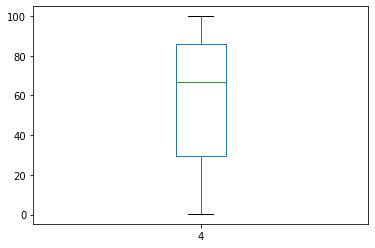

In [5]:
for column_name in range(5):
    print(f'Getting statistics for {column_name}')
    col = df[str(column_name)]
    n = len(col)
    print(f'Mean: {col.mean()}')
    print(f'Sample variance: {col.var() * (n - 1) / n}')
    print(f'Unbiased variance: {col.var()}')
    print(f'Skew coeff: {skew(col)}')
    print(f'Kurtosis coeff: {kurtosis(col)}')
    print(f'Median: {col.median()}')
    sns.distplot(col, bins=50)
    plt.show()

    col.plot.box()
    plt.show()
    print("===================================")

Most of the columns do not have any outliers. The first column has actually got many of them, so let's check it more carefully.

In [6]:
col = df['0']

In [7]:
col.size

263

In [8]:
col_wo_outliers = col[col.between(col.quantile(.25), col.quantile(.975))]

In [9]:
col_wo_outliers.size

190

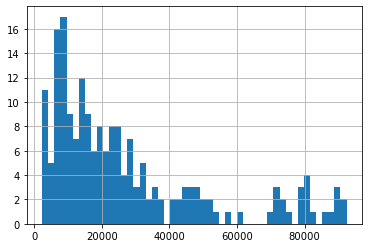

In [10]:
col_wo_outliers.hist(bins=50)

Probably it's a good idea to drop elements with outliers, but we cannot be sure about that. It's necessary to study the data origin first. In addition to that, there are really many outliers (25% nearly), so maybe this is a result of bad sample quality (it might be not representative). As much as I understood the data is the measurement results for some sensors, so the theoretically possible minimum and maximum values of feature '0' could help a lot. 

Now let's check the corrlation. The pearson's correlation is the best way to do it. 
As you can see, the columns 3 and 4 are strongly correlated.

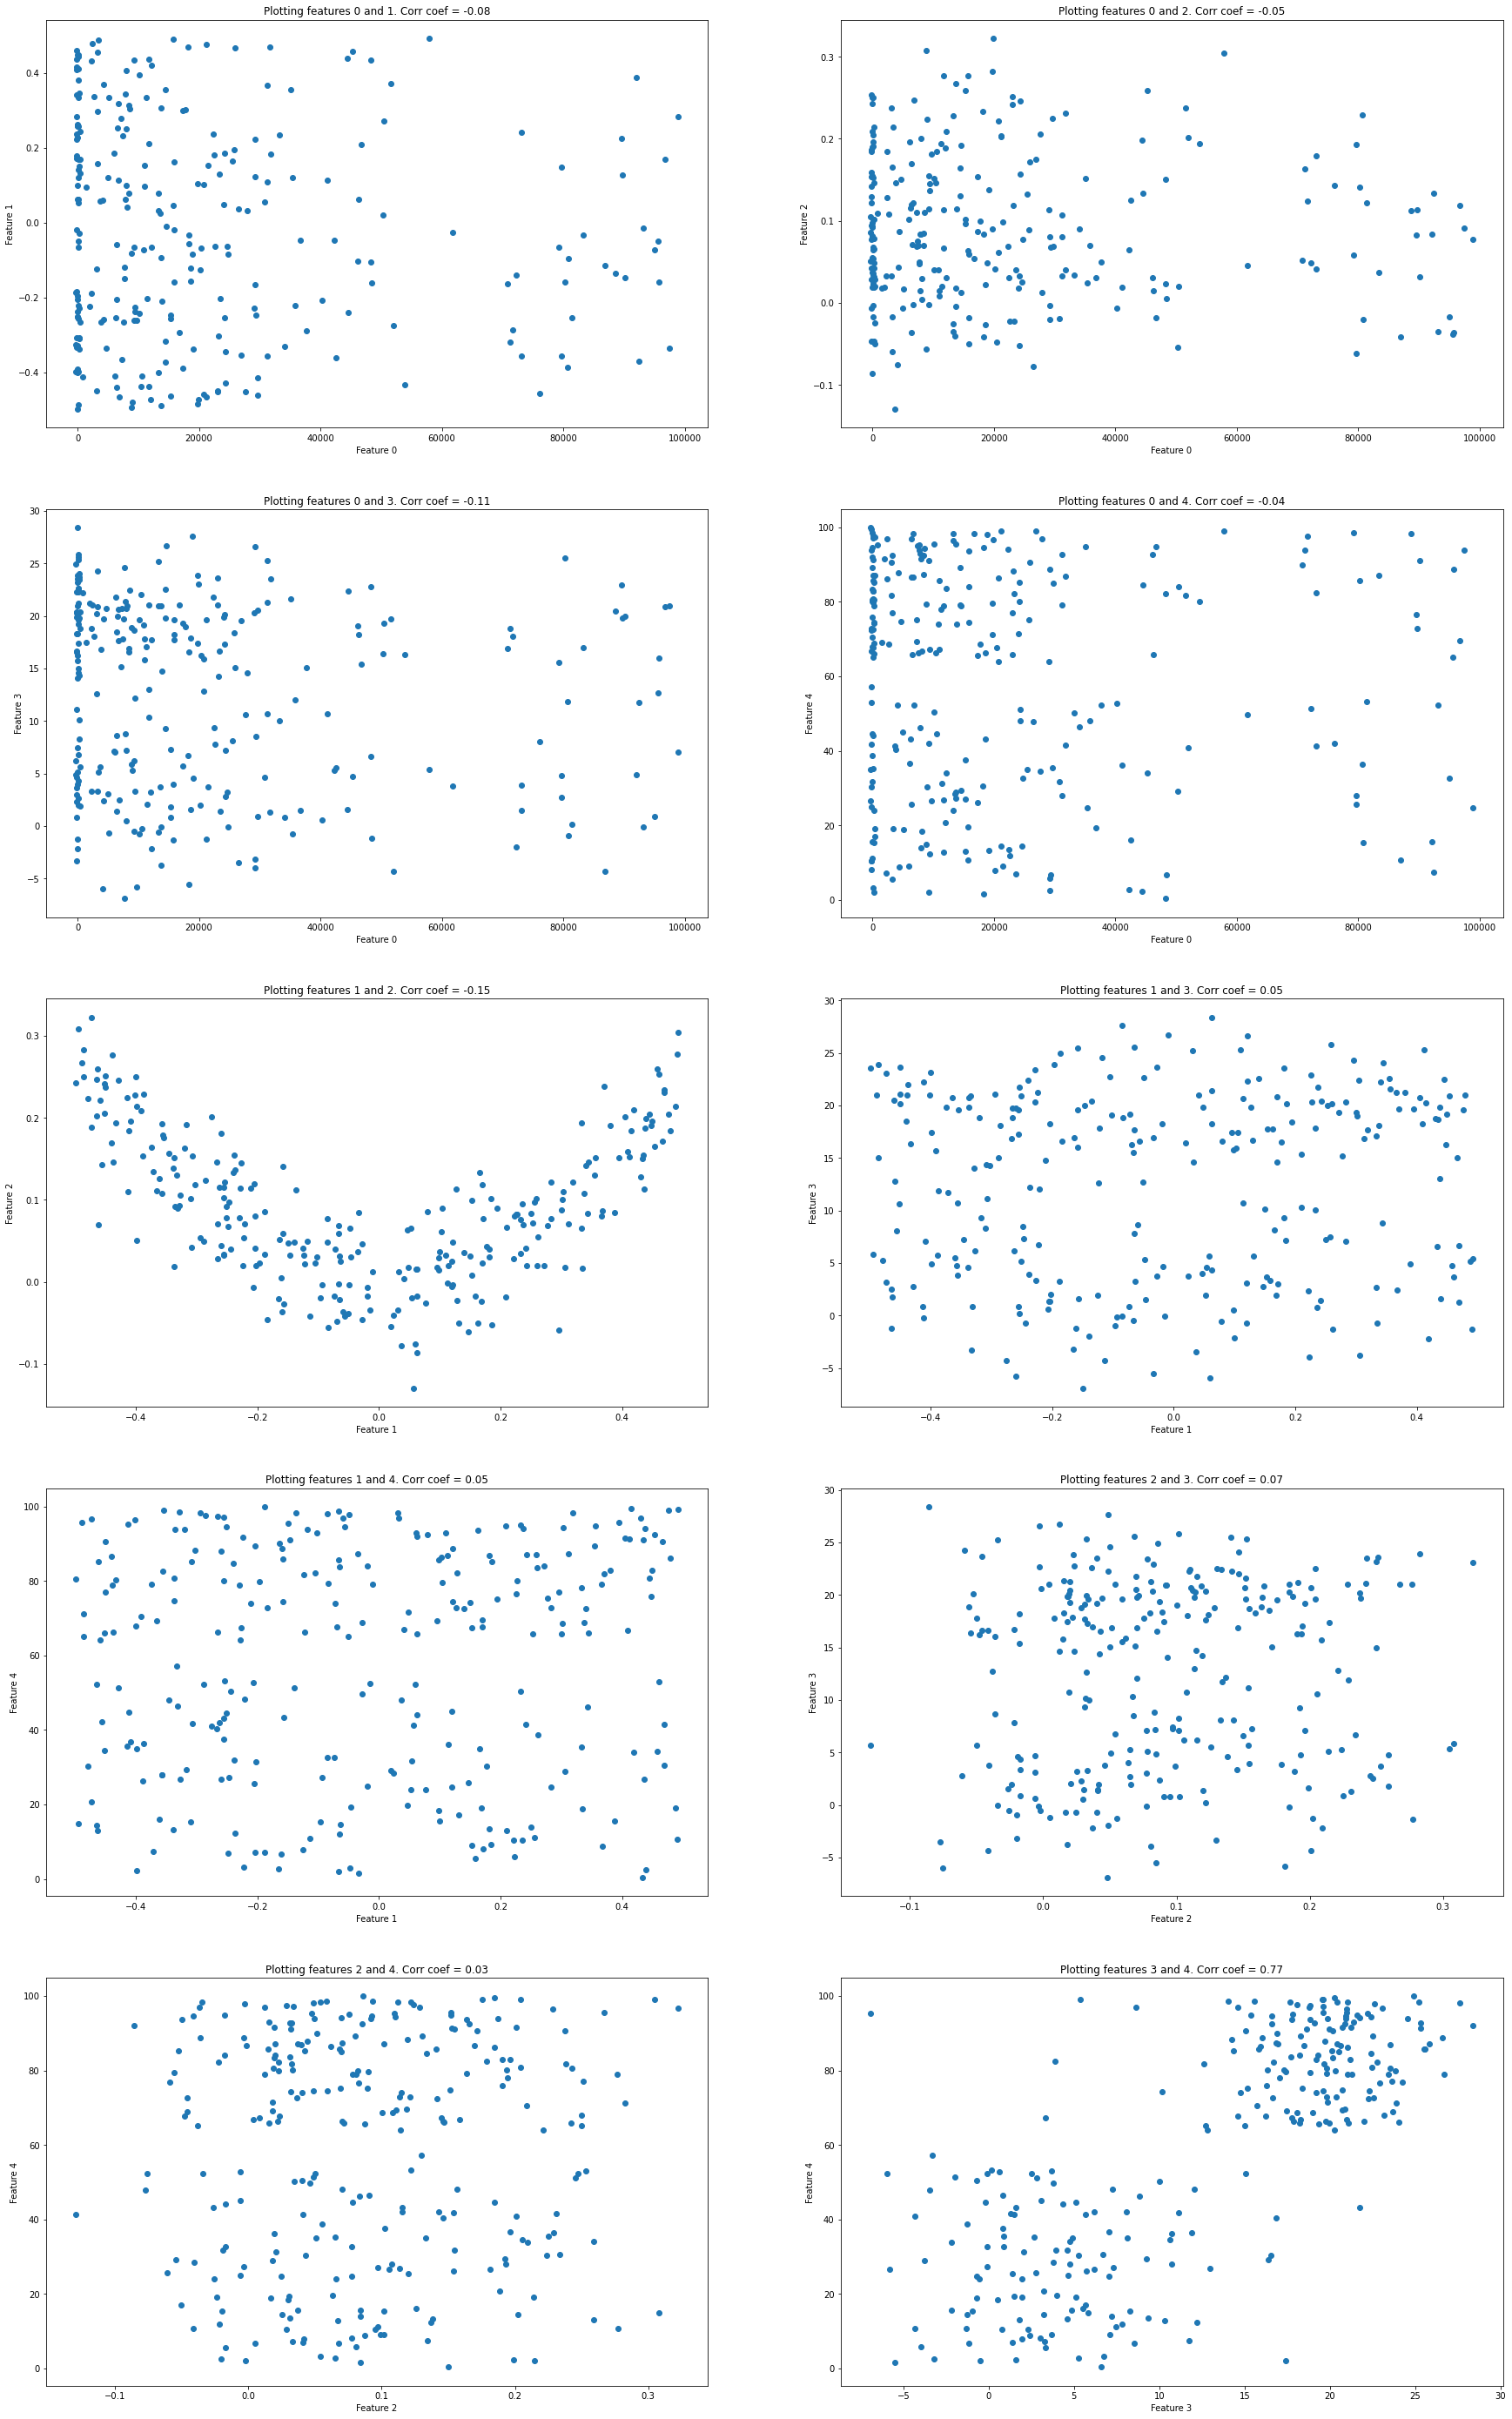

In [11]:
fig, axis = plt.subplots(5, 2, figsize=(30,50))
axis = [i for j in axis for i in j]
cur_ax_index = 0 
for cn1 in range(5):
    for cn2 in range(cn1 + 1, 5):
        col1 = df[str(cn1)]
        col2 = df[str(cn2)]
        ax = axis[cur_ax_index]
        axis[cur_ax_index].set_title(f'Plotting features {cn1} and {cn2}. Corr coef = {round(pearsonr(col1, col2)[0], 2)}') 
        axis[cur_ax_index].scatter(col1, col2)
        axis[cur_ax_index].set_xlabel(f'Feature {cn1}')
        axis[cur_ax_index].set_ylabel(f'Feature {cn2}')
        cur_ax_index += 1
plt.show()

The '2'-feature depends on feature '1' quadratically. So we can drop one of those features. Features 3 and 4 have quite a bif correlation coefficient (0.77), but the data plot doesn't look like a linear fucntion. In addition to that, it looks like there are two clusters here. All in all, I woulnd't recmmend to drop any of features 3 or 4.